In [75]:
# Written by Parameth Nganmoonkiew
# Last modified : 07/02/2023 15:24
import pandas as pd

# Note : Raw is concentration (ug/m^3)
uncleaned_df = pd.read_excel('Bratislava_Kamenne nam_AQI.xlsx')

uncleaned_df = uncleaned_df[['Date and time', 'PM10', 'PM2.5']]
uncleaned_df['Date'] = pd.to_datetime(uncleaned_df['Date and time'], format='%d.%m.%Y %H:%M').dt.strftime('%d/%m/%Y')
uncleaned_df['Time'] = pd.to_datetime(uncleaned_df['Date and time'], format='%d.%m.%Y %H:%M').dt.strftime('%H:%M')

cleaned_df = uncleaned_df[['Date', 'Time', 'PM10', 'PM2.5']]

with pd.ExcelWriter('cleaned_data_Bratislava.xlsx', mode='w', engine='openpyxl') as writtenFile:
    cleaned_df.to_excel(writtenFile, sheet_name='concentration', index=False)

In [54]:
def calculate_AQI(x):
    # Good
    if x < 12.1:
        xi, xj = 0, 12.0
        ii, ij = 0, 50
    # Moderate
    elif x < 35.5:
        xi, xj = 12.0, 35.4
        ii, ij = 51, 100
    # Unhealthy for sensitive group
    elif x < 55.5:
        xi, xj = 35.5, 55.4
        ii, ij = 101, 150
    # Unhealthy
    elif x < 150.5:
        xi, xj = 55.5, 150.4
        ii, ij = 151, 200
    # Very unhealthy
    elif x < 250.5:
        xi, xj = 150.5, 250.4
        ii, ij = 201, 300
    # Hazadous
    elif x >= 250.5:
        xi, xj = 0, 250.5
        ii, ij = 0, 250.5
    AQI = (((ij - ii)/(xj-xi))*(x-xi))+ii
    return AQI

In [55]:
# Calculate AQI-US
df = pd.read_excel('cleaned_data_Bratislava.xlsx')
df['PM2.5_AQI'] = df['PM2.5'].apply(lambda x: calculate_AQI(x))

# Store into new sheet named AQI
with pd.ExcelWriter('cleaned_data_Bratislava.xlsx', mode='w', engine='openpyxl') as writtenFile:
    df.to_excel(writtenFile, sheet_name='AQI_Data', index=False)

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# If you've cleaned the data, run this instead.
df = pd.read_excel('cleaned_data_Bratislava.xlsx')
df.head(5)

,Date,Time,PM10,PM2.5,PM2.5_AQI
0,01/01/2024,07:00,6,4,16.666667
1,01/01/2024,08:00,7,4,16.666667
2,01/01/2024,09:00,8,5,20.833333
3,01/01/2024,10:00,8,5,20.833333
4,01/01/2024,11:00,7,2,8.333333


In [43]:
df.describe()

,PM10,PM2.5,PM2.5_AQI
count,890.000000,890.000000,890.000000
mean,16.440449,11.250562,38.384773
std,13.181580,10.994074,32.567394
min,0.000000,0.000000,0.000000
25%,7.000000,3.000000,12.500000
50%,13.000000,7.000000,29.166667
75%,25.000000,19.000000,65.658120
max,58.000000,46.000000,126.854271


In [5]:
df.shape

(890, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       890 non-null    object 
 1   Time       890 non-null    object 
 2   PM10       890 non-null    int64  
 3   PM2.5      890 non-null    int64  
 4   PM2.5_AQI  890 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [7]:
df[df['PM2.5_AQI'] == df['PM2.5_AQI'].max()]

,Date,Time,PM10,PM2.5,PM2.5_AQI
519,22/01/2024,22:00,55,46,126.854271


In [56]:
df['PM2.5_AQI_Levels'] = pd.cut(df['PM2.5'], bins=[-10, 15.6, 40.6, 65.6, 150.6, 250.6,400], 
                        labels=['Good', 'Moderate', 'Unhealthy for sensitive people',\
                                'Unhealty', 'Very Unhealthy', 'Hazardous'])
df.head(5)

,Date,Time,PM10,PM2.5,PM2.5_AQI,PM2.5_AQI_Levels
0,01/01/2024,07:00,6,4,16.666667,Good
1,01/01/2024,08:00,7,4,16.666667,Good
2,01/01/2024,09:00,8,5,20.833333,Good
3,01/01/2024,10:00,8,5,20.833333,Good
4,01/01/2024,11:00,7,2,8.333333,Good


In [57]:
df.groupby(by=['PM2.5_AQI_Levels'])[['PM2.5_AQI']].count()

,PM2.5_AQI
PM2.5_AQI_Levels,
Good,610
Moderate,269
Unhealthy for sensitive people,11
Unhealty,0
Very Unhealthy,0
Hazardous,0


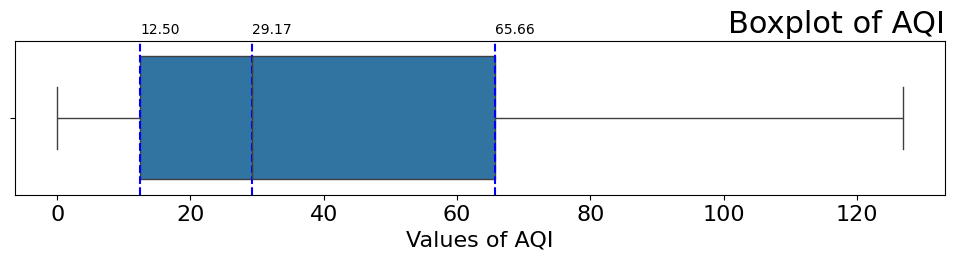

In [58]:
# Boxplot determines whether data contains outliers or not.
quantiles = df['PM2.5_AQI'].quantile([.25,.5,.75]).tolist()

fig, ax = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=df['PM2.5_AQI'])
ax.axes.set_title('Boxplot of AQI', fontsize=22, loc='right')
ax.set_xlabel('Values of AQI', fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
for i in range(0,3):
    ax.axvline(x=quantiles[i], ymin = 0, ymax = 1,\
                  linestyle= '--', color='b')
    ax.text(quantiles[i],-0.55, '{:.2f}'.format(quantiles[i]))

plt.show()

In [10]:
# Palette for each level in AQI
palette=['green','yellow','orange','red','purple','maroon']

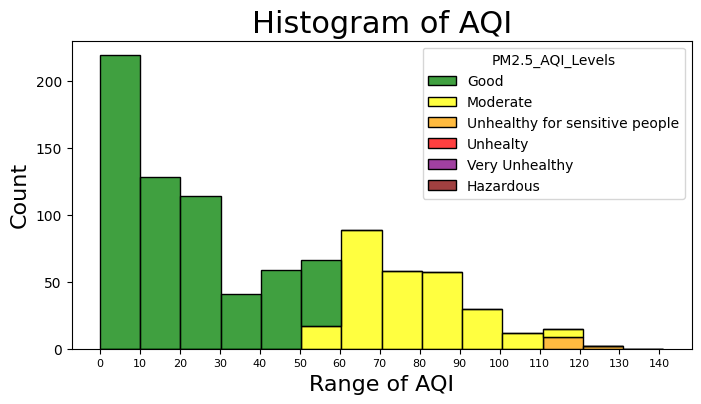

In [59]:
# Histogram to explore distribution of AQI values
xtick_labels_hist = [i for i in range(0,141,10)]

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.histplot(data=df, x='PM2.5_AQI', binwidth=10, binrange=(0,141), \
                  multiple='stack', hue='PM2.5_AQI_Levels',\
                  palette=palette)
ax.axes.set_title('Histogram of AQI', fontsize=22)
ax.set_xlabel('Range of AQI', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.xaxis.set_tick_params(labelsize=8)
plt.xticks(xtick_labels_hist, xtick_labels_hist)
plt.show()

In [114]:
df['Date and Time'] = pd.DataFrame({'Date and Time' : \
                    pd.to_datetime(df.Date + ' ' + df.Time, \
                    format='%d/%m/%Y %H:%M')})
df['Date and Time'] = df['Date and Time'].dt.strftime('%d/%m/%Y %H:%M')
df.head(5)

,Date,Time,PM10,PM2.5,PM2.5_AQI,PM2.5_AQI_Levels,Date and Time
0,01/01/2024,07:00,6,4,16.666667,Good,01/01/2024 07:00
1,01/01/2024,08:00,7,4,16.666667,Good,01/01/2024 08:00
2,01/01/2024,09:00,8,5,20.833333,Good,01/01/2024 09:00
3,01/01/2024,10:00,8,5,20.833333,Good,01/01/2024 10:00
4,01/01/2024,11:00,7,2,8.333333,Good,01/01/2024 11:00


In [61]:
# resize x-ticks to fit df['Date and Time']'s length
xticks_list = list()
vlines_list = list()
for dateTime in df['Date and Time'].values.tolist():
    if (str(dateTime)[-5:len(str(dateTime))] == '00:00'): 
        xticks_list.append("{}\n{}".format(str(dateTime)[0:2],str(dateTime)[3:5]))
        vlines_list.append(str(dateTime))
    else:
        xticks_list.append(' ')   

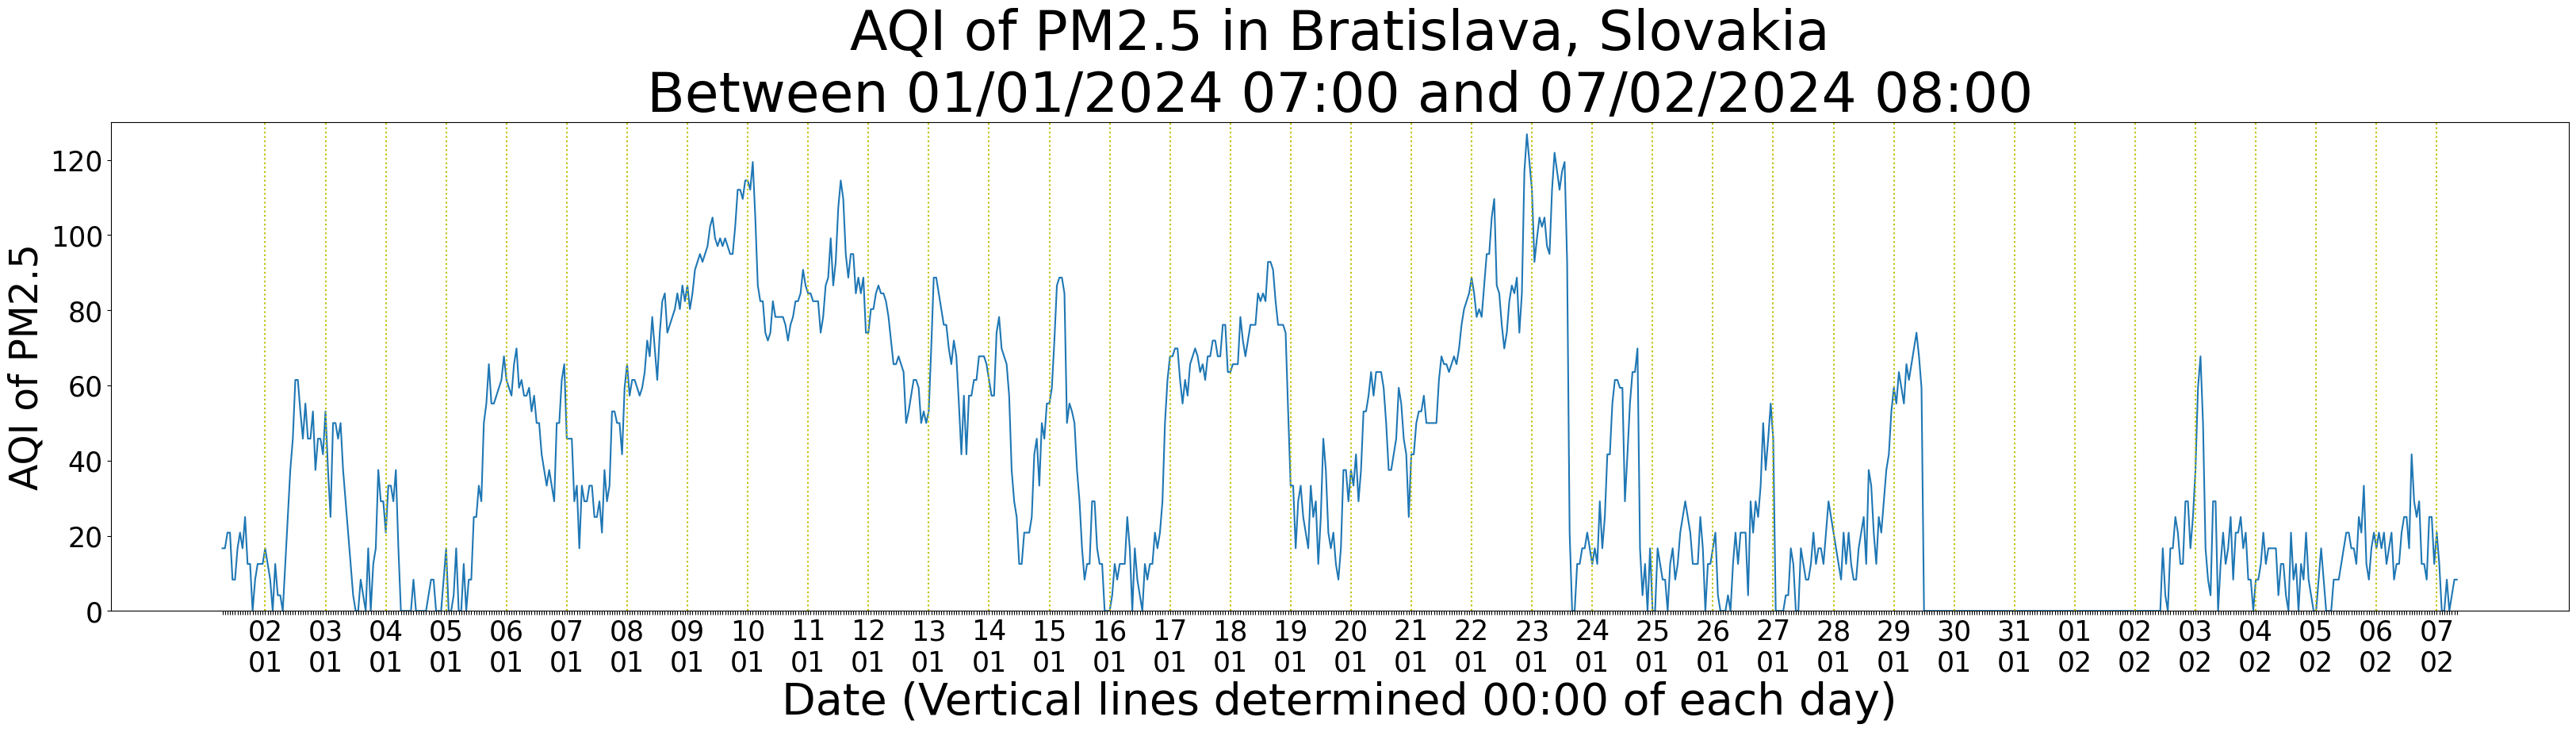

In [62]:
# Time Series
fig, ax = plt.subplots(figsize=(40,8))
ax = sns.lineplot(x=df['Date and Time'], y=df['PM2.5_AQI'])
ax.axes.set_title('AQI of PM2.5 in Bratislava, Slovakia\nBetween 01/01/2024 07:00 and 07/02/2024 08:00',\
      fontsize=50)
ax.set(xticks=df['Date and Time'].values)
ax.set_xlabel('Date (Vertical lines determined 00:00 of each day)', \
              fontsize=40)
ax.set_ylabel('AQI of PM2.5', fontsize=35)

# X-ticks
ax.set_xticks(range(len(df['Date and Time'])))
ax.set_xticklabels(xticks_list)
ax.yaxis.set_tick_params(labelsize=25)
ax.xaxis.set_tick_params(labelsize=25)

# draw vertical lines
for dateTime in df['Date and Time'].values.tolist():
    if dateTime in vlines_list:
        ax.axvline(x=dateTime, ymin = 0, ymax = 1,\
                  linestyle= ':', color='y')

plt.ylim(0,130)
plt.show()

In [97]:
# Clean data for plotting heatmap
heatmap_data = df.pivot('Time', 'Date', 'PM2.5_AQI_Levels')
heatmap_data_list = list()
for i in heatmap_data.columns.values:
    if i[3:5] == '01':
        heatmap_data_list.append(i)
for i in heatmap_data:
    if i[3:5] == '02':
        heatmap_data_list.append(i)
heatmap_data = heatmap_data[heatmap_data_list]
del heatmap_data_list

In [98]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['nan', 'Good', 'Moderate', 'Unhealthy for sensitive people',\
        'Unhealty', 'Very Unhealthy', 'Hazardous'])
enc_heatmap_data = heatmap_data.apply(le.transform)

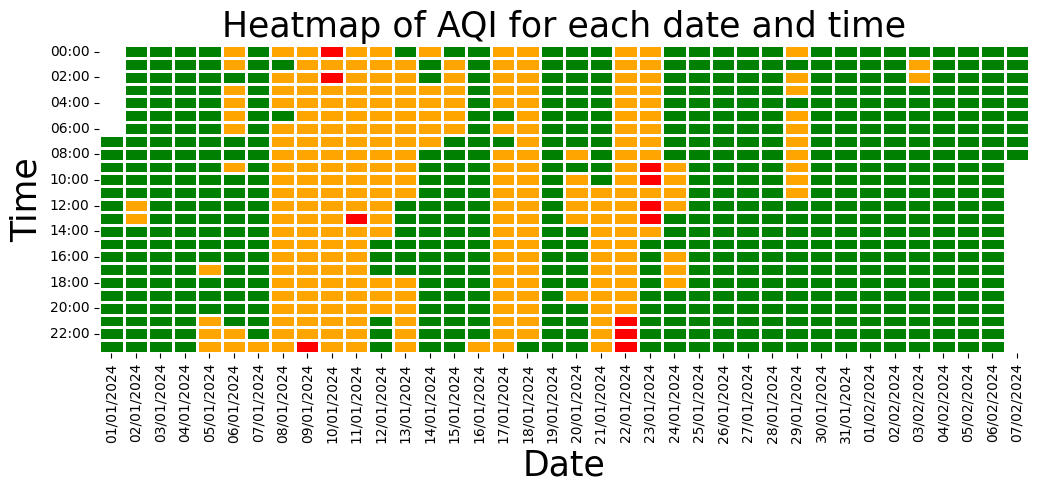

In [113]:
hm_palette = ['green','yellow','orange','red','purple','maroon','white']

# Heat map
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.heatmap(enc_heatmap_data, cmap=hm_palette, linewidths=2, \
                 linecolor='white', cbar=False)
ax.axes.set_title('Heatmap of AQI for each date and time', fontsize=25)
ax.set_xlabel('Date', fontsize=25)
ax.set_ylabel('Time', fontsize=25)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
plt.show()

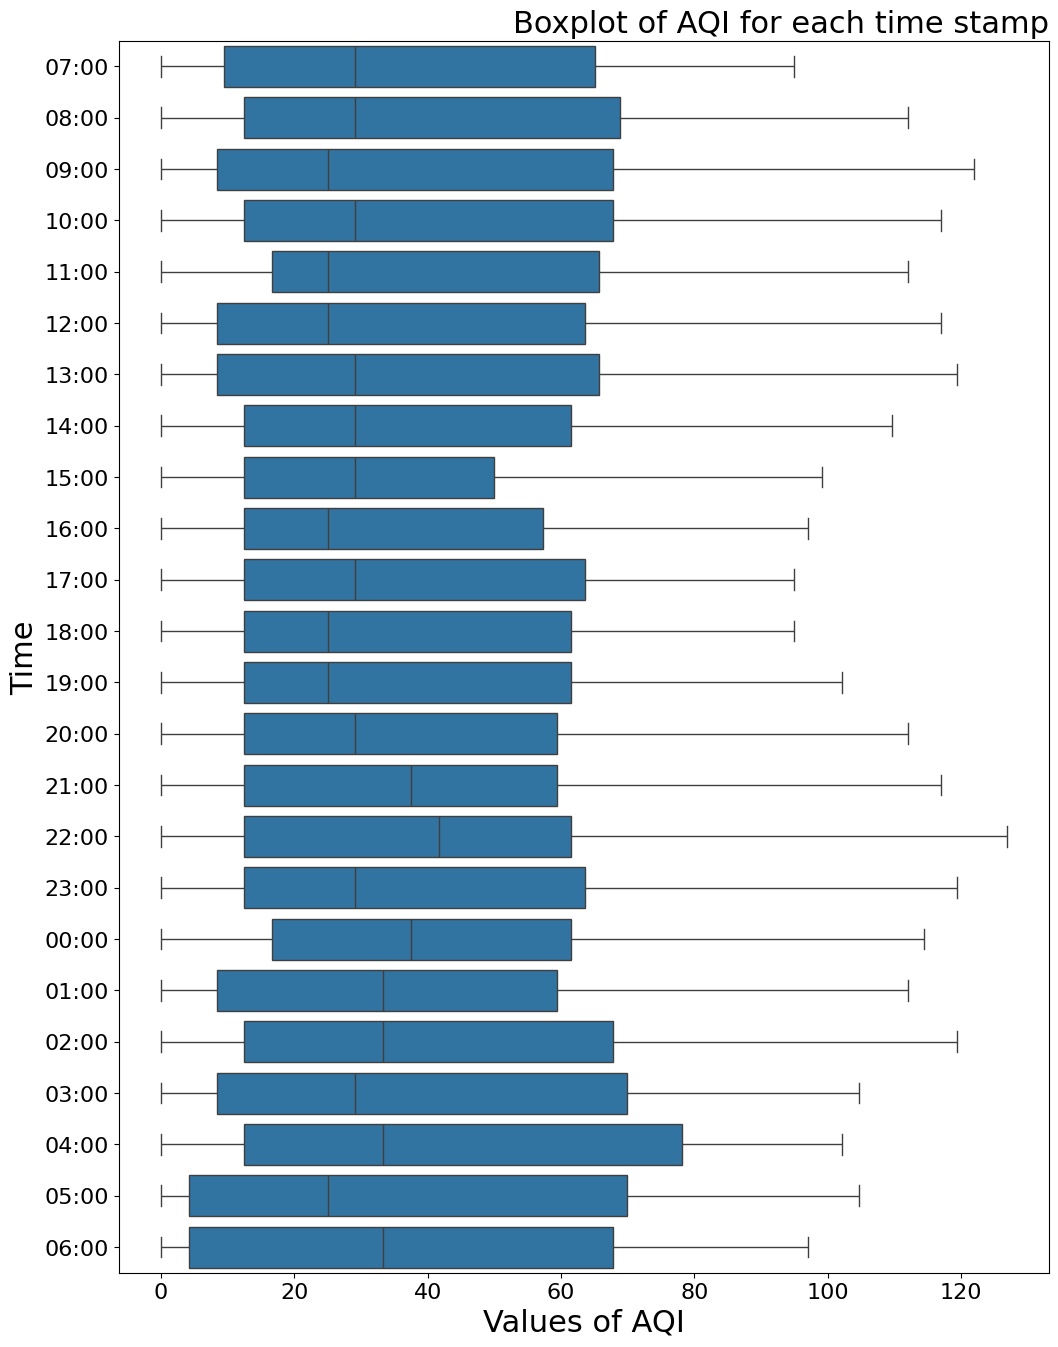

In [253]:
# Boxplot determines whether data contains outliers or not.
quantiles = df['PM2.5_AQI'].quantile([.25,.5,.75]).tolist()

fig, ax = plt.subplots(figsize=(12,16))
ax = sns.boxplot(data=df, x='PM2.5_AQI', y='Time')
ax.axes.set_title('Boxplot of AQI for each time stamp', fontsize=22, loc='right')
ax.set_xlabel('Values of AQI', fontsize=22)
ax.set_ylabel('Time', fontsize=22)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()